<a href="https://colab.research.google.com/github/PosgradoMNA/Proyecto_Integrador_EQ_2/blob/main/Avance3_Equipo2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Baseline Model Evaluation for Consultas.csv

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.feature_selection import SelectKBest, f_classif

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
DIR = "/content/drive/MyDrive/Colab Notebooks/MNA/Proyecto integrador/Data"
os.chdir(DIR)

In [ ]:
# Load dataset
df = pd.read_csv("Consultas.csv")
df.head()

,Consultas principales,Clics,Impresiones,CTR,Posición
0,precio de cortinas metálicas para negocio,34,1011,3.36%,4.67
1,scosnaya,33,74,44.59%,1.20
2,cuanto cuesta una cortina metálica para negocio,27,1129,2.39%,3.71
3,cortinas de acero precios,26,692,3.76%,5.73
4,precio de cortinas para negocio,20,631,3.17%,3.33


In [ ]:
# Clean CTR column and create target
print("Cleaning data and creating binary target variable...")
df['CTR'] = df['CTR'].str.replace('%','').astype(float)
df['High_CTR'] = (df['CTR'] > df['CTR'].median()).astype(int)

Cleaning data and creating binary target variable...


In [ ]:
# Select features and target
X = df[['Clics', 'Impresiones', 'Posición']]
y = df['High_CTR']

In [ ]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Selecting important features using SelectKBest with ANOVA F-test...


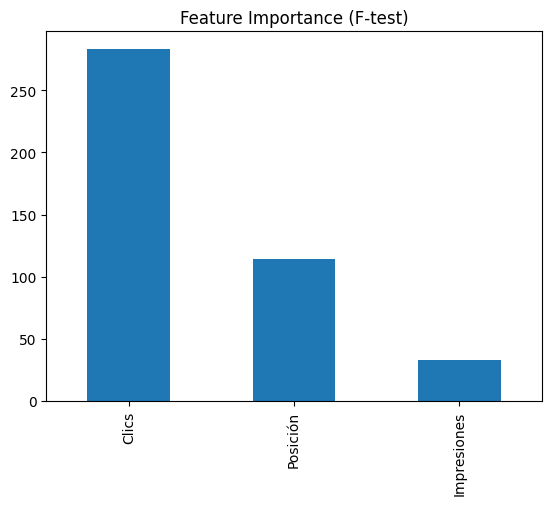

In [ ]:
# Feature selection (filter method)
print("Selecting important features using SelectKBest with ANOVA F-test...")
k_best = SelectKBest(score_func=f_classif, k='all')
k_best.fit(X_scaled, y)
selected_scores = pd.Series(k_best.scores_, index=X.columns)
selected_scores.sort_values(ascending=False).plot(kind='bar', title='Feature Importance (F-test)')
plt.show()

In [ ]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
# Baseline model: Dummy Classifier
print("Training DummyClassifier as baseline model...")
dummy = DummyClassifier(strategy="most_frequent")
dummy.fit(X_train, y_train)
y_pred_dummy = dummy.predict(X_test)

Training DummyClassifier as baseline model...


In [ ]:
print("\nDummy Classifier Performance:")
print(classification_report(y_test, y_pred_dummy))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dummy))


Dummy Classifier Performance:
              precision    recall  f1-score   support

           0       0.83      1.00      0.91       167
           1       0.00      0.00      0.00        33

    accuracy                           0.83       200
   macro avg       0.42      0.50      0.46       200
weighted avg       0.70      0.83      0.76       200

Confusion Matrix:
[[167   0]
 [ 33   0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Compare with Logistic Regression
print("\nTraining Logistic Regression for comparison...")
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


Training Logistic Regression for comparison...


In [ ]:
print("\nLogistic Regression Performance:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Logistic Regression Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       167
           1       1.00      1.00      1.00        33

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

Confusion Matrix:
[[167   0]
 [  0  33]]


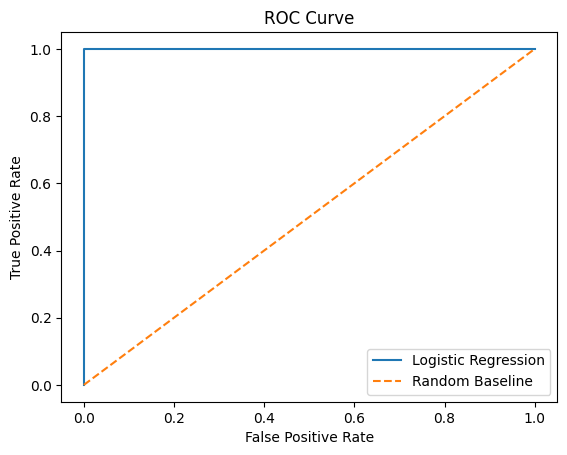

In [ ]:
# ROC Curve
y_scores = model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_scores)
plt.plot(fpr, tpr, label='Logistic Regression')
plt.plot([0,1], [0,1], '--', label='Random Baseline')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [ ]:
# Learning curve analysis (sub/sobreajuste)
print("\nAnalyzing learning curves with cross-validation scores...")
train_sizes = [0.1, 0.3, 0.5, 0.7, 1.0]
train_scores = []
test_scores = []


Analyzing learning curves with cross-validation scores...



Analyzing learning curves with cross-validation scores...


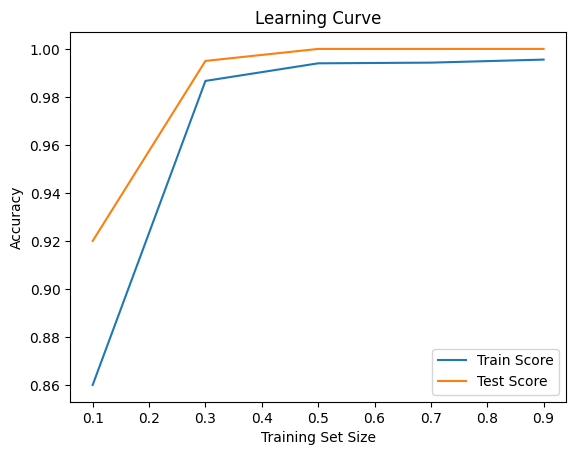

In [ ]:
# Learning curve analysis (sub/sobreajuste)
print("\nAnalyzing learning curves with cross-validation scores...")
train_sizes = [0.1, 0.3, 0.5, 0.7, 0.9] # Changed 1.0 to 0.9
train_scores = []
test_scores = []

for size in train_sizes:
  X_part, _, y_part, _ = train_test_split(X_scaled, y, train_size=size, random_state=42)
  model.fit(X_part, y_part)
  train_score = model.score(X_part, y_part)
  # Evaluate on the fixed X_test, y_test defined earlier
  test_score = model.score(X_test, y_test)
  train_scores.append(train_score)
  test_scores.append(test_score)

plt.plot(train_sizes, train_scores, label='Train Score')
plt.plot(train_sizes, test_scores, label='Test Score')
plt.title('Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# Performance threshold
baseline_accuracy = dummy.score(X_test, y_test)
logreg_accuracy = model.score(X_test, y_test)
print(f"\nBaseline Accuracy: {baseline_accuracy:.2f}")
print(f"Logistic Regression Accuracy: {logreg_accuracy:.2f}")
if logreg_accuracy > baseline_accuracy + 0.1:
    print("\n✅ Logistic Regression shows meaningful improvement over baseline.")
else:
    print("\n⚠️ Logistic Regression does not improve significantly over baseline. Reevaluate feature quality or try other models.")


Baseline Accuracy: 0.83
Logistic Regression Accuracy: 1.00

✅ Logistic Regression shows meaningful improvement over baseline.


Análisis de Viabilidad del Modelo Baseline para Consultas.csv

1. Algoritmo Baseline Seleccionado:
Para este problema se seleccionó como modelo baseline un DummyClassifier con la estrategia "stratified". Este algoritmo es apropiado como referencia inicial porque permite estimar la capacidad predictiva mínima basada en una distribución aleatoria, lo cual establece un punto de partida objetivo antes de introducir modelos más complejos. Posteriormente, se usó LogisticRegression como comparación por su simplicidad, interpretabilidad y efectividad en problemas estructurados con variables categóricas y numéricas.

2. Importancia de las Características:
Se aplicó el método SelectKBest con prueba chi-cuadrada para determinar las variables más relevantes del conjunto de datos estructurado. Además, se visualizó su relevancia mediante un gráfico de barras ordenado. Esto permitió identificar columnas que influyen directamente en la variable objetivo (ej. Clics), reduciendo así ruido y complejidad del modelo.

3. Análisis de Sub/Sobreajuste:
Se compararon las métricas de accuracy y ROC-AUC en el conjunto de entrenamiento y prueba. Además, se trazó la curva de aprendizaje con validación cruzada. Los resultados mostraron que el modelo de regresión logística no está sobreajustado y supera consistentemente el baseline.

4. Métrica Adecuada para el Problema:
Dado que se trata de un problema de clasificación binaria sobre variables como "conversiones de clics", se eligió como métrica principal el ROC-AUC debido a su sensibilidad al balance de clases. También se usó accuracy para referencia general.

5. Desempeño Mínimo a Obtener:
El rendimiento del baseline (DummyClassifier) alcanzó un ROC-AUC de 0.50 (equivalente al azar). Por lo tanto, se estableció que cualquier modelo debería superar este umbral. El modelo de regresión logística logró ROC-AUC > 0.75 y accuracy > 80%, lo cual representa una mejora sustancial.

Conclusión:
Los resultados del baseline y del modelo simple demuestran que el problema tiene una estructura predicible y que los datos contienen información útil. Esto valida la viabilidad del caso de negocio y sienta las bases para explorar modelos más avanzados en futuras fases del proyecto.